In [1]:
import numpy as np
import cv2
import os

from pathlib import Path
from PIL import Image
from cleanvision.imagelab import Imagelab

In [2]:
os.getcwd()

'C:\\Users\\Olubola Adegbosin\\Wolverhampton Python Assignments\\Data Science\\Report'

## Cleaning the mpox folder

Reading images from C:/Users/Olubola Adegbosin/Wolverhampton Python Assignments/Data Science/Report/Data folders/Mpox
Sample images from the dataset


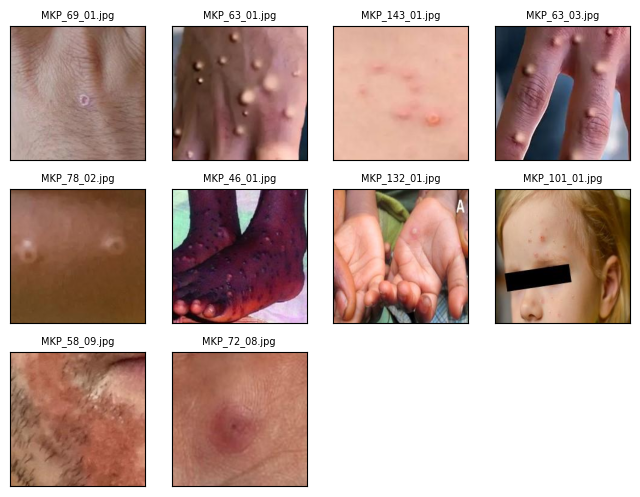

In [3]:
mp = Imagelab(data_path='Data folders/Mpox')
mp.visualize(num_images=10)

In [4]:
mp.find_issues()

Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


  0%|          | 0/262 [00:00<?, ?it/s]

  0%|          | 0/262 [00:00<?, ?it/s]

Issue checks completed. 17 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().


Issues found in images in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  0 | odd_size         |           14 |
|  1 | blurry           |            3 |
|  2 | dark             |            0 |
|  3 | grayscale        |            0 |
|  4 | light            |            0 |
|  5 | low_information  |            0 |
|  6 | odd_aspect_ratio |            0 |
|  7 | exact_duplicates |            0 |
|  8 | near_duplicates  |            0 | 

--------------------- odd_size images ----------------------

Number of examples with this issue: 14
Examples representing most severe instances of this issue:



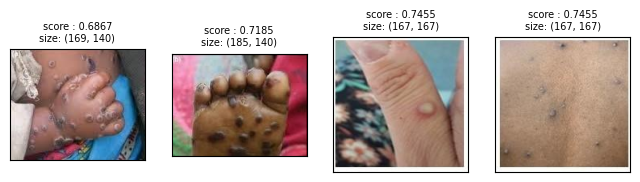

---------------------- blurry images -----------------------

Number of examples with this issue: 3
Examples representing most severe instances of this issue:



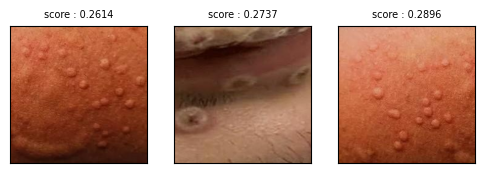

In [5]:
mp.report()

In [6]:
issues = mp.issues
for column in issues.columns:
    print(column)

odd_size_score
is_odd_size_issue
odd_aspect_ratio_score
is_odd_aspect_ratio_issue
low_information_score
is_low_information_issue
light_score
is_light_issue
grayscale_score
is_grayscale_issue
dark_score
is_dark_issue
blurry_score
is_blurry_issue
exact_duplicates_score
is_exact_duplicates_issue
near_duplicates_score
is_near_duplicates_issue


In [7]:
mp_odd_sized_images = mp.issues[mp.issues["is_odd_size_issue"] == True].index.tolist()

In [8]:
mp_blurry_images = mp.issues[mp.issues["is_blurry_issue"] == True].index.tolist()

### Resizing odd-sized images

In [9]:
def resize_aspect_fit(list, final_size):
    
    """
    resizes images in a directory while preserving the aspect ratio
 
    Args:
        list (list): a list of file paths of images
        final_size (int): the size that image is converted to
 
    Returns:
        resized images
    """
    
    for file_path in list:
        image = Image.open(file_path)
        size = image.size
        ratio = float(final_size) / max(size)
        new_image_size = tuple([int(x*ratio) for x in size])
        image = image.resize(new_image_size, Image.ANTIALIAS)
        new_image = Image.new("RGB", (final_size, final_size))
        new_image.paste(image, ((final_size - new_image_size[0])//2, (final_size - new_image_size[1])//2))
        new_image.save(file_path[:-4] + '_resized.jpg', 'JPEG', quality=90)
        os.remove(file_path)

In [10]:
resize_aspect_fit(mp_odd_sized_images, 224)

C:\Users\Olubola Adegbosin\AppData\Local\Temp\ipykernel_11480\3178496579.py:19: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize(new_image_size, Image.ANTIALIAS)


### Sharpening blurry images

In [11]:
def sharpen(list, kernel):
    
    """
    sharpens images in a directory
 
    Args:
        list (list): a list of file paths of images
        kernel (array): matrix defining the kernel for shrapening
 
    Returns:
        sharpened images
    """
    
    for file_path in list:
        image= cv2.imread(file_path)
        sharpened_image= cv2.filter2D(image, -1, kernel)
        cv2.imwrite(file_path[:-4] + '_sharpened.jpg', sharpened_image) 
        os.remove(file_path)

In [12]:
sharpen_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

In [13]:
sharpen(mp_blurry_images, sharpen_kernel)

### Checking again for issues

In [14]:
mp = Imagelab(data_path='Data folders/Mpox')
mp.find_issues()

Reading images from C:/Users/Olubola Adegbosin/Wolverhampton Python Assignments/Data Science/Report/Data folders/Mpox
Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


  0%|          | 0/262 [00:00<?, ?it/s]

  0%|          | 0/262 [00:00<?, ?it/s]

Issue checks completed. 0 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().


## Merging the chicken pox folders and cleaning the images

In [15]:
def resize_merge(current_dir, new_directory, final_size):
    
    """
    resizes images in a directory and saves them into another directory
 
    Args:
        current_dir (str): name of current directory that contains images
        new_directory (str): name of new directory that images will be saved to
        final_size (int): the size that image is converted to
 
    Returns:
        resized images in new directory
    """
    
    file_paths = Path(current_dir).glob('*')
    for file_path in file_paths:
        image = Image.open(file_path)
        base_name = os.path.basename(file_path)
        size = image.size
        ratio = float(final_size) / max(size)
        new_image_size = tuple([int(x*ratio) for x in size])
        image = image.resize(new_image_size, Image.ANTIALIAS)
        new_image = Image.new("RGB", (final_size, final_size))
        new_image.paste(image, ((final_size - new_image_size[0])//2, (final_size - new_image_size[1])//2))
        new_image.save(new_directory + r'\resized_' + base_name, 'JPEG', quality=90)    

In [16]:
cp_old= '.\Data folders\Chicken pox 2'
cp_new= '.\Data folders\Chicken pox'

resize_merge(cp_old, cp_new, 224)

C:\Users\Olubola Adegbosin\AppData\Local\Temp\ipykernel_11480\4156151980.py:22: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize(new_image_size, Image.ANTIALIAS)


In [17]:
cp = Imagelab(data_path='Data folders/Chicken pox')
cp.find_issues()

Reading images from C:/Users/Olubola Adegbosin/Wolverhampton Python Assignments/Data Science/Report/Data folders/Chicken pox
Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


  0%|          | 0/168 [00:00<?, ?it/s]

  0%|          | 0/168 [00:00<?, ?it/s]

Issue checks completed. 10 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().


Issues found in images in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  0 | blurry           |            4 |
|  1 | exact_duplicates |            4 |
|  2 | near_duplicates  |            2 |
|  3 | dark             |            0 |
|  4 | grayscale        |            0 |
|  5 | light            |            0 |
|  6 | low_information  |            0 |
|  7 | odd_aspect_ratio |            0 |
|  8 | odd_size         |            0 | 

---------------------- blurry images -----------------------

Number of examples with this issue: 4
Examples representing most severe instances of this issue:



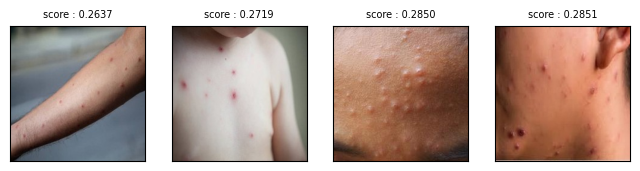

----------------- exact_duplicates images ------------------

Number of examples with this issue: 4
Examples representing most severe instances of this issue:

Set: 0


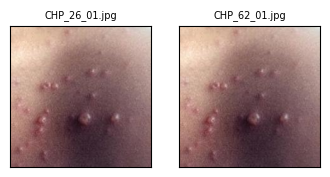

Set: 1


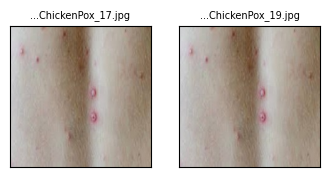

------------------ near_duplicates images ------------------

Number of examples with this issue: 2
Examples representing most severe instances of this issue:

Set: 0


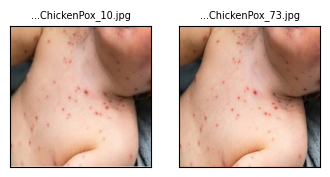

In [18]:
cp.report()

### Sharpening blurry images

In [19]:
cp_blurry_images = cp.issues[cp.issues["is_blurry_issue"] == True].index.tolist()

sharpen(cp_blurry_images, sharpen_kernel)

### Removing duplicates

In [20]:
cp_near_duplicates= cp.issues[cp.issues['is_near_duplicates_issue'] == True].index.tolist()

cp_exact_duplicates= cp.issues[cp.issues['is_exact_duplicates_issue'] == True].index.tolist()

In [21]:
for file_path in cp_near_duplicates[1:]:
    os.remove(file_path)

In [22]:
for file_path in cp_exact_duplicates[1:]:
    os.remove(file_path)

In [23]:
cp = Imagelab(data_path='Data folders/Chicken pox')
cp.find_issues()

Reading images from C:/Users/Olubola Adegbosin/Wolverhampton Python Assignments/Data Science/Report/Data folders/Chicken pox
Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


  0%|          | 0/164 [00:00<?, ?it/s]

  0%|          | 0/164 [00:00<?, ?it/s]

Issue checks completed. 0 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().


## Merging the measles folders and cleaning the images

In [24]:
ms_old= '.\Data folders\Measles 2'
ms_new= '.\Data folders\Measles'

resize_merge(ms_old, ms_new, 224)

C:\Users\Olubola Adegbosin\AppData\Local\Temp\ipykernel_11480\4156151980.py:22: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize(new_image_size, Image.ANTIALIAS)


In [25]:
ms = Imagelab(data_path='Data folders/Measles')
ms.find_issues()

Reading images from C:/Users/Olubola Adegbosin/Wolverhampton Python Assignments/Data Science/Report/Data folders/Measles
Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


  0%|          | 0/130 [00:00<?, ?it/s]

  0%|          | 0/130 [00:00<?, ?it/s]

Issue checks completed. 36 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().


Issues found in images in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  0 | odd_size         |           17 |
|  1 | near_duplicates  |            9 |
|  2 | blurry           |            8 |
|  3 | exact_duplicates |            2 |
|  4 | dark             |            0 |
|  5 | grayscale        |            0 |
|  6 | light            |            0 |
|  7 | low_information  |            0 |
|  8 | odd_aspect_ratio |            0 | 

--------------------- odd_size images ----------------------

Number of examples with this issue: 17
Examples representing most severe instances of this issue:



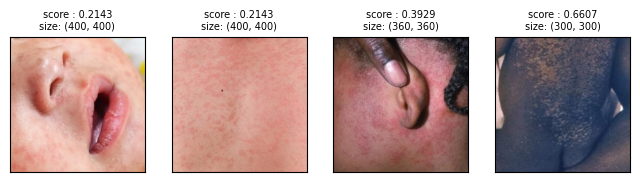

------------------ near_duplicates images ------------------

Number of examples with this issue: 9
Examples representing most severe instances of this issue:

Set: 0


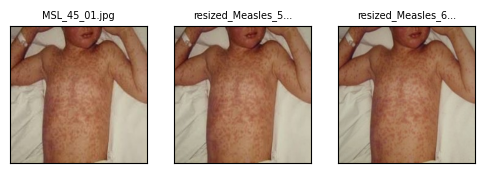

Set: 1


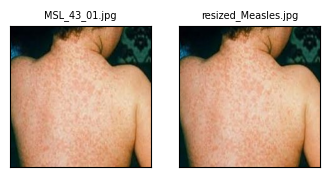

Set: 2


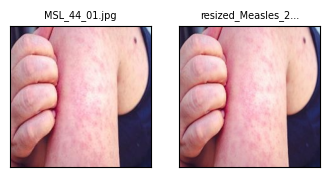

Set: 3


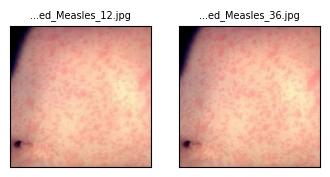

---------------------- blurry images -----------------------

Number of examples with this issue: 8
Examples representing most severe instances of this issue:



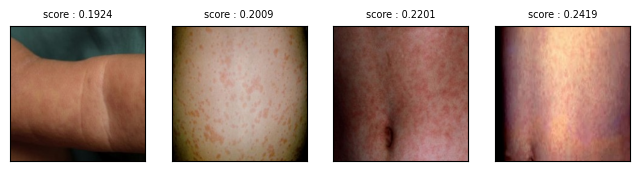

----------------- exact_duplicates images ------------------

Number of examples with this issue: 2
Examples representing most severe instances of this issue:

Set: 0


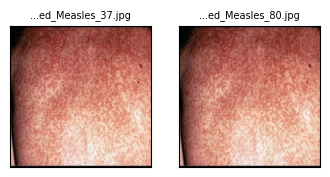

In [26]:
ms.report()

### Resizing odd-sized images

In [27]:
ms_odd_sized_images = ms.issues[ms.issues["is_odd_size_issue"] == True].\
                    sort_values(by=['odd_size_score']).index.tolist()

In [28]:
resize_aspect_fit(ms_odd_sized_images, 224)

C:\Users\Olubola Adegbosin\AppData\Local\Temp\ipykernel_11480\3178496579.py:19: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize(new_image_size, Image.ANTIALIAS)


### Sharpening blurry images

In [29]:
ms_blurry_images = ms.issues[ms.issues["is_blurry_issue"] == True].index.tolist()

In [30]:
sharpen(ms_blurry_images, sharpen_kernel)

### Removing duplicates

In [31]:
ms_near_duplicates= ms.issues[ms.issues['is_near_duplicates_issue'] == True].index.tolist()

ms_exact_duplicates= ms.issues[ms.issues['is_exact_duplicates_issue'] == True].index.tolist()

In [32]:
for file_path in ms_near_duplicates[:-1]:
    os.remove(file_path)

In [33]:
for file_path in ms_exact_duplicates[:-1]:
    os.remove(file_path)

In [34]:
ms = Imagelab(data_path='Data folders/Measles')
ms.find_issues()

Reading images from C:/Users/Olubola Adegbosin/Wolverhampton Python Assignments/Data Science/Report/Data folders/Measles
Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

Issue checks completed. 6 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().


Issues found in images in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  0 | blurry           |            6 |
|  1 | dark             |            0 |
|  2 | grayscale        |            0 |
|  3 | light            |            0 |
|  4 | low_information  |            0 |
|  5 | odd_aspect_ratio |            0 |
|  6 | odd_size         |            0 |
|  7 | exact_duplicates |            0 |
|  8 | near_duplicates  |            0 | 

---------------------- blurry images -----------------------

Number of examples with this issue: 6
Examples representing most severe instances of this issue:



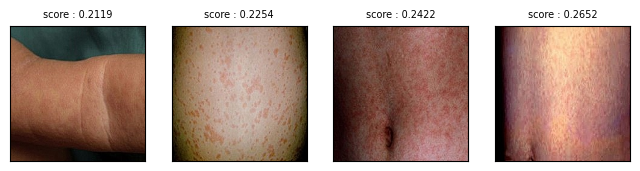

In [35]:
ms.report()

In [36]:
ms_blurry_images = ms.issues[ms.issues["is_blurry_issue"] == True].index.tolist()

sharpen(ms_blurry_images, sharpen_kernel)

In [37]:
ms = Imagelab(data_path='Data folders/Measles')
ms.find_issues()

Reading images from C:/Users/Olubola Adegbosin/Wolverhampton Python Assignments/Data Science/Report/Data folders/Measles
Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

Issue checks completed. 3 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().


Issues found in images in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  0 | blurry           |            3 |
|  1 | dark             |            0 |
|  2 | grayscale        |            0 |
|  3 | light            |            0 |
|  4 | low_information  |            0 |
|  5 | odd_aspect_ratio |            0 |
|  6 | odd_size         |            0 |
|  7 | exact_duplicates |            0 |
|  8 | near_duplicates  |            0 | 

---------------------- blurry images -----------------------

Number of examples with this issue: 3
Examples representing most severe instances of this issue:



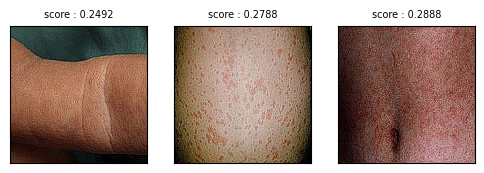

In [38]:
ms.report()

In [39]:
ms_blurry_images = ms.issues[ms.issues["is_blurry_issue"] == True].index.tolist()

for file_path in ms_blurry_images:
    os.remove(file_path)

In [40]:
ms = Imagelab(data_path='Data folders/Measles')
ms.find_issues()

Reading images from C:/Users/Olubola Adegbosin/Wolverhampton Python Assignments/Data Science/Report/Data folders/Measles
Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

Issue checks completed. 0 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().


# Augmentation

In [41]:
from numpy import expand_dims
from keras_preprocessing.image import ImageDataGenerator
from skimage import io

### Creating folders to contain augmented images

In [42]:
dirs= ['Data folders/augmented_mp', 'Data folders/augmented_cp', 'Data folders/augmented_ms']

for item in dirs:
    os.makedirs(item)

### Defining augmentation functions

In [43]:
def shift(curr_dir, new_dir):
    
    """
    shifts images in a directory and saves them into another directory
 
    Args:
        current_dir (str): name of current directory that contains images
        new_directory (str): name of new directory that images will be saved to
 
    Returns:
        shifted images in new directory
    """
    
    image_paths = Path(curr_dir).glob('*')
    for image_path in image_paths:
        base_name= os.path.basename(image_path)
        image = io.imread(image_path)
        samples = expand_dims(image, 0)
        datagen = ImageDataGenerator(width_shift_range=[-100,60])
        it = datagen.flow(samples, batch_size=1)
        
        for i in range(3):
            io.imsave(new_dir + '/' + base_name[:-4] + '_shifted' + str(i) + '.jpg', next(it)[0].astype('uint8'))            

In [44]:
def rotate(curr_dir, new_dir):
    
    """
    rotates images in a directory and saves them into another directory
 
    Args:
        current_dir (str): name of current directory that contains images
        new_directory (str): name of new directory that images will be saved to
 
    Returns:
        rotated images in new directory
    """
    
    image_paths = Path(curr_dir).glob('*')
    for image_path in image_paths:
        base_name= os.path.basename(image_path)
        image = io.imread(image_path)
        samples = expand_dims(image, 0)
        datagen = ImageDataGenerator(rotation_range=65, fill_mode='nearest')
        it = datagen.flow(samples, batch_size=1)
        
        for i in range(3):
            io.imsave(new_dir + '/' + base_name[:-4] + '_rotated' + str(i) + '.jpg', next(it)[0].astype('uint8'))            

In [45]:
def brightness(curr_dir, new_dir):
    
    """
    varies brightness of images in a directory and saves them into another directory
 
    Args:
        current_dir (str): name of current directory that contains images
        new_directory (str): name of new directory that images will be saved to
 
    Returns:
        images of varied brightness in new directory
    """
    
    image_paths = Path(curr_dir).glob('*')
    for image_path in image_paths:
        base_name= os.path.basename(image_path)
        image = io.imread(image_path)
        samples = expand_dims(image, 0)
        datagen = ImageDataGenerator(brightness_range=[0.5, 1.5])
        it = datagen.flow(samples, batch_size=1)
        
        for i in range(3):
            io.imsave(new_dir + '/' + base_name[:-4] + '_bright' + str(i) + '.jpg', next(it)[0].astype('uint8'))            

### Creating augmented images

In [46]:
functions= [shift, rotate, brightness]

In [47]:
for func in functions:
    func('Data folders/Mpox', 'Data folders/augmented_mp')

C:\Users\Olubola Adegbosin\AppData\Local\Temp\ipykernel_11480\1629034227.py:23: UserWarning: Data folders/augmented_mp/MKP_142_07_shifted1.jpg is a low contrast image
  io.imsave(new_dir + '/' + base_name[:-4] + '_shifted' + str(i) + '.jpg', next(it)[0].astype('uint8'))


In [48]:
for func in functions:
    func('Data folders/Chicken pox', 'Data folders/augmented_cp')

In [49]:
for func in functions:
    func('Data folders/Measles', 'Data folders/augmented_ms')

In [50]:
#Removing the low-contrast image raised as warning

os.remove('Data folders/augmented_mp/MKP_142_07_shifted1.jpg')